STEP 1: Load Dependencies

In [80]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn 
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score


Drive Mount

In [81]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Load and prepare data

In [82]:
import os

In [83]:
path = os.listdir ('/content/drive/MyDrive/p data/Data')
classes = {'Parasitized':0, 'Uninfected':1}

In [84]:
import cv2
x=[]
y=[]
for cls in classes:
  pth='/content/drive/MyDrive/p data/Data/train/'+ cls
  for j in os.listdir(pth):
    img= cv2.imread(pth+'/'+j,0)
    img= cv2.resize(img,(200,200))
    x.append(img)
    y.append(classes[cls])

Data Analysis

In [85]:
x= np.array(x)
y= np.array(y)
x_update = x.reshape(len(x),-1)

In [86]:
np.unique(y)

array([0, 1])

In [87]:
import pandas as pd
pd.Series(y).value_counts()

0    3618
1      35
dtype: int64

In [88]:
x.shape,x_update.shape

((3653, 200, 200), (3653, 40000))

STEP 4: Data Visualization

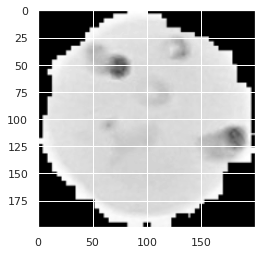

In [89]:
plt.imshow(x[0],cmap='gray')

STEP 5: Split Data

In [90]:
xtrain,xtest,ytrain,ytest=train_test_split(x_update,y,test_size=0.30,random_state=10)

In [91]:
xtrain.shape,xtest.shape

((2557, 40000), (1096, 40000))

**STEP 6: Feature Scaling**

In [92]:
print(xtrain.max(),xtrain.min())
print(xtest.max(),xtest.min())
xtrain= xtrain/255
xtest= xtest/255
print(xtrain.max(),xtrain.min())
print(xtest.max(),xtest.min())

217 0
211 0
0.8509803921568627 0.0
0.8274509803921568 0.0


STEP 7: Model Training:LogisticRegression,SVM,RandomForestClassifier


In [93]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier 

**Model Fit**

In [94]:
import warnings
warnings.filterwarnings('ignore')
lg=LogisticRegression()
lg.fit(xtrain,ytrain)

LogisticRegression()

In [95]:
sv= SVC()
sv.fit(xtrain,ytrain)

SVC()

**STEP 8: Evaluation**

In [96]:
print("Training Score:",lg.score(xtrain,ytrain))
print("Testing Score:",lg.score(xtest,ytest))


Training Score: 1.0
Testing Score: 0.989963503649635


In [97]:
print("Training Score:",sv.score(xtrain,ytrain))
print("Testing Score:",sv.score(xtest,ytest))

Training Score: 0.9894407508799374
Testing Score: 0.9927007299270073


In [98]:
rlcf=RandomForestClassifier()

In [99]:
rlcf.fit(xtrain,ytrain)

RandomForestClassifier()

In [100]:
print("Training Score:",rlcf.score(xtrain,ytrain))
print("Testing Score:",rlcf.score(xtest,ytest))

Training Score: 1.0
Testing Score: 0.9927007299270073


In [101]:
from sklearn.tree import DecisionTreeClassifier

In [102]:
clf=DecisionTreeClassifier()

In [103]:
clf.fit(xtrain,ytrain) 

DecisionTreeClassifier()

In [104]:
clf.score(xtest,ytest)

0.9771897810218978

In [105]:
from sklearn.naive_bayes import GaussianNB

In [106]:
GNB = GaussianNB()

In [107]:
GNB.fit(xtrain,ytrain)

GaussianNB()

In [108]:
GNB.score(xtest,ytest)

0.6651459854014599

**STEP 9: Prediction**

In [109]:
pred= sv.predict(xtest)

In [110]:
pred

array([0, 0, 0, ..., 0, 0, 0])

In [111]:
from sklearn.metrics import accuracy_score

In [112]:
accuracy_score(ytest,pred)

0.9927007299270073

In [113]:
from sklearn.metrics import confusion_matrix

In [114]:
confusion_matrix(ytest,pred)

array([[1088,    0],
       [   8,    0]])

In [115]:
from sklearn.metrics import classification_report

In [116]:
print (classification_report(ytest,pred))

              precision    recall  f1-score   support

           0       0.99      1.00      1.00      1088
           1       0.00      0.00      0.00         8

    accuracy                           0.99      1096
   macro avg       0.50      0.50      0.50      1096
weighted avg       0.99      0.99      0.99      1096



**STEP 10: TESTING (On test dataset)**

In [117]:
dec = {0:'Parasitized',1:'Uninfected'}

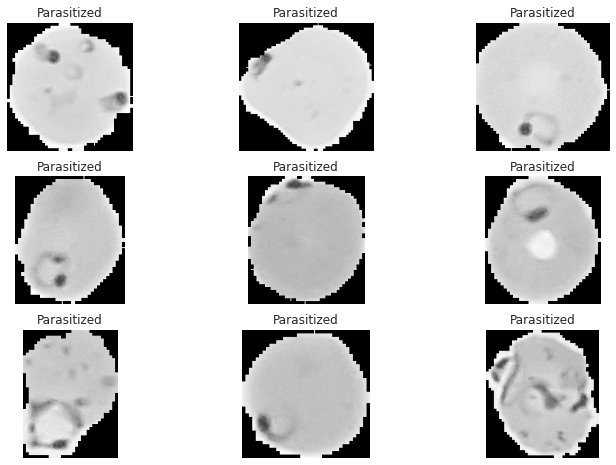

In [118]:
plt.figure(figsize=(12,8))
p=os.listdir('/content/drive/MyDrive/p data/Data/train/')
c=1
for i in os.listdir('/content/drive/MyDrive/p data/Data/train/Parasitized/')[:9]:
    plt.subplot(3,3,c)
    img= cv2.imread('/content/drive/MyDrive/p data/Data/train/Parasitized/'+i,0)
    img1=cv2.resize(img,(200,200))
    img1=img1.reshape(1,-1)/255
    p=lg.predict(img1)
    plt.title(dec[p[0]])
    plt.imshow(img,cmap='gray')
    plt.axis('off')
    c+=1

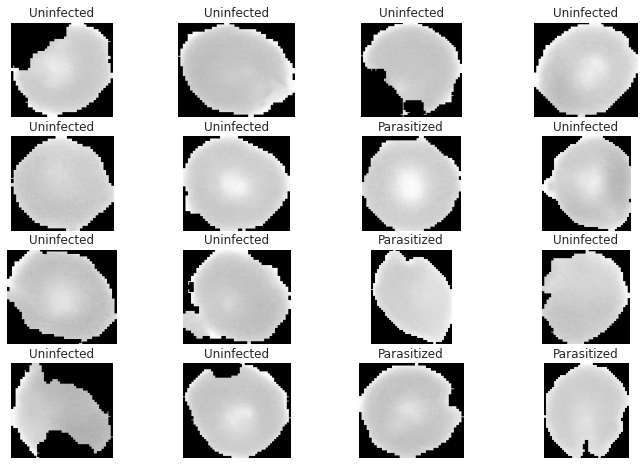

In [119]:
plt.figure(figsize=(12,8))
p=os.listdir('/content/drive/MyDrive/p data/Data/train/')
c=1
for i in os.listdir('/content/drive/MyDrive/p data/Data/train/Uninfected/')[:16]:
    plt.subplot(4,4,c)
    img= cv2.imread('/content/drive/MyDrive/p data/Data/train/Uninfected/'+i,0)
    img1=cv2.resize(img,(200,200))
    img1=img1.reshape(1,-1)/255
    p=lg.predict(img1)
    plt.title(dec[p[0]])
    plt.imshow(img,cmap='gray')
    plt.axis('off')
    c+=1

**Roc Curve**

In [120]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import plot_roc_curve

In [121]:
xtrain,xtest,ytrain,ytest=train_test_split(x_update,y,test_size=0.25,random_state=10)



In [122]:
lg=LogisticRegression()
sv= SVC()
rlcf=RandomForestClassifier()
clf=DecisionTreeClassifier()
GNB = GaussianNB()


In [124]:
lg.fit(xtrain,ytrain);
sv.fit(xtrain,ytrain);
rlcf.fit(xtrain,ytrain);
clf.fit(xtrain,ytrain);
GNB.fit(xtrain,ytrain);

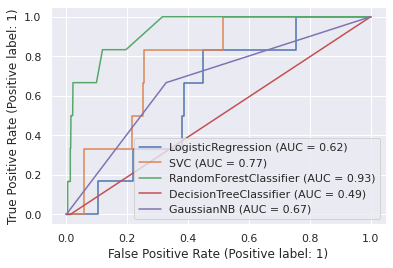

In [125]:
disp= plot_roc_curve(lg, xtest,ytest)
plot_roc_curve(sv, xtest,ytest, ax=disp.ax_);
plot_roc_curve(rlcf, xtest,ytest, ax=disp.ax_);
plot_roc_curve(clf, xtest,ytest, ax=disp.ax_);
plot_roc_curve(GNB, xtest,ytest, ax=disp.ax_);

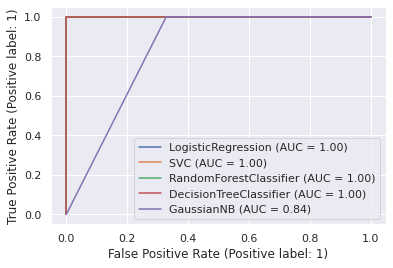

In [126]:
disp= plot_roc_curve(lg, xtrain,ytrain)
plot_roc_curve(sv, xtrain,ytrain, ax=disp.ax_);
plot_roc_curve(rlcf,xtrain,ytrain, ax=disp.ax_);
plot_roc_curve(clf, xtrain,ytrain,  ax=disp.ax_);
plot_roc_curve(GNB, xtrain,ytrain,  ax=disp.ax_);

**Thank You**